### Samuel Oluwatayo Alajo

### About Nexus Bank


Nexus Bank is a financial institution that offers a range of banking and financial solutions to its clients, including personal and business banking, investment management, and various loans and mortgages. The bank has a commitment to providing excellent customer service and transparency, with a focus on creating long-lasting relationships with its customers by offering tailored financial solutions to meet individual needs and goals. The bank also places importance on sustainability and social responsibility. With a team of experienced professionals, Nexus Bank aims to help clients achieve their financial goals and secure their financial future.

### Project Overview

The project aims to provide insights into customer behavior, loan trends, and marketing campaign effectiveness for Nexus Bank. The bank's directors have expressed dissatisfaction with their current situation and seek to optimize their operations, reduce the risk of loan defaults, and improve customer subscription to term deposits. They  approached me as a data scientist to analyze their data and identify patterns and trends in customer behavior based on demographics such as age, education level, and more. 

The goal is to anticipate future customer behavior, determine the likelihood of subscription to term deposits, and provide insights on how effective their current campaigns are. By analyzing the data, Nexus Bank wants to tailor their marketing campaigns to specific customer segments effectively and increase their subscription to term deposits.

One specific area of focus is term deposits, which are a type of investment or savings product where individuals deposit a specific amount of money for a fixed period. Understanding customer attitudes and behaviors toward term deposits is crucial for Nexus Bank to improve their financial offerings and attract more customers.

Overall, the project aims to optimize Nexus Bank's operations and mitigate risks such as loan defaults while improving customer engagement and satisfaction through tailored marketing campaigns and an improved understanding of customer behavior.

### Goal


The goal of building supervised and unsupervised learning models in this project is to leverage the power of data analytics and machine learning techniques to gain insights into customer behavior, loan trends, and campaign effectiveness. The supervised learning model would aim to predict the likelihood of subscription to term deposits among customers based on historical customer data and demographic features such as age, education level, and more. This model would be trained on labeled data with a known target variable (i.e., whether or not a customer subscribed to a term deposit).

On the other hand, the unsupervised learning model aims to identify underlying patterns and structures in the data that may not be immediately apparent. This model would be trained on unlabeled data and would help to identify clusters of customers that exhibit similar behaviors, preferences, or demographics. Such insights could then be used to provide targeted marketing campaigns to specific customer segments.

Overall, the goal of building supervised and unsupervised learning models in this project is to enable Nexus Bank to make data-driven decisions on optimizing their operations, improving customer engagement, and managing risk.

In [1]:
# For Data Analysis

import pandas as pd
import numpy as np


# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler



# Classifier Libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


# pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier



# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix




import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
df = pd.read_csv(r'/Users/mac/Downloads/bank.csv')

In [3]:
# Print the top rows
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# Print the bottom rows
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
# Dimensionality of the data - The number of rows and columns

df.shape

(45211, 17)

In [6]:
# Data Verification - Data type, Number of features and rows, Missing data, etc

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
# Statistical Analysis of the Dataset

df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
# Check for missing values in the dataset

null_vals = df.isnull().sum()
null_vals

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

<AxesSubplot:>

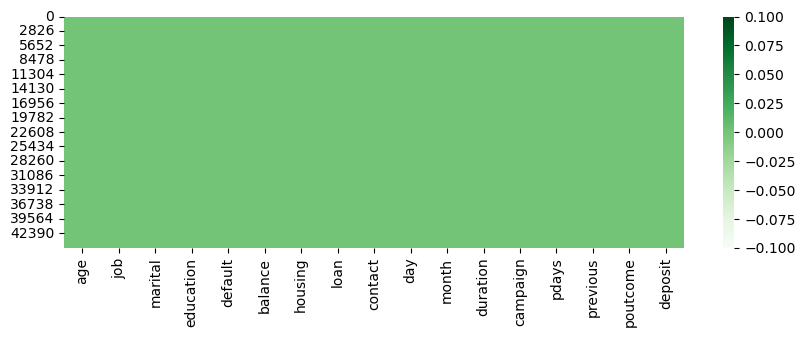

In [9]:
# Visualize missing values using heatmap

plt.figure(figsize = (10,3))
sns.heatmap(df.isnull(), cbar=True, cmap= 'Greens')

In [10]:
# Check for duplicate(s)

df.duplicated().sum()

0

### Exploratory Data Analysis

### Univariate Analysis

In [11]:
def season(month):
    if month == 'mar':
        return 'spring'  
    elif month == 'apr':
        return 'spring' 
    elif month == 'may':
        return 'spring' 
    elif month == 'jun':
        return 'summer' 
    elif month == 'jul':
        return 'summer' 
    elif month == 'aug':
        return 'summer' 
    elif month == 'sep':
        return 'autumn' 
    elif month == 'oct':
        return 'autumn' 
    elif month == 'nov':
        return 'autumn' 
    elif month == 'dec':
        return 'winter' 
    elif month == 'jan':
        return 'winter' 
    elif month == 'feb':
        return 'winter'
    
df['season'] = df['month'].apply(season)

In [12]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,season
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,spring
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,spring
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,spring
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,spring
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,spring


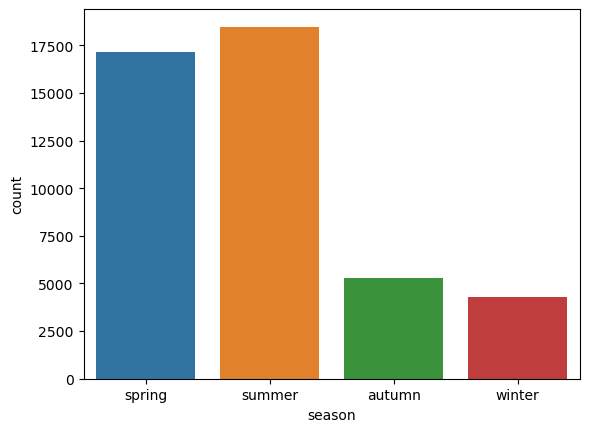

In [13]:
sns.countplot(x="season", data=df);

In [14]:
df['season'].value_counts()

summer    18483
spring    17175
autumn     5287
winter     4266
Name: season, dtype: int64

### Narration:

This chart provides an insight into the seasonal trends in customer contact. 

The count reveals that the summer season has the highest number of customer contacts(18483), followed by spring(17175), autumn(5287), and winter(4266). This suggests that customers are more likely to be contacted during the warmer months of the year.

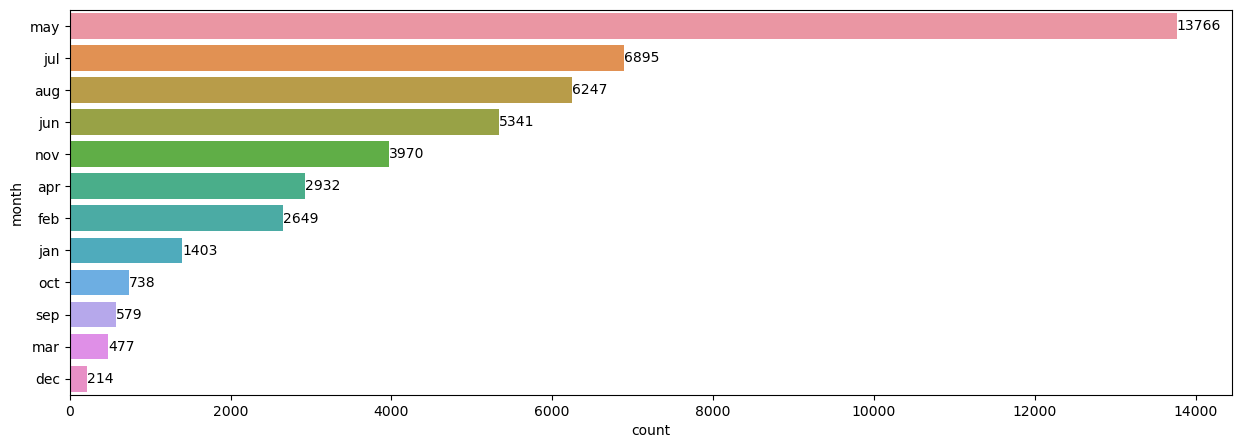

In [15]:
# Analysis On The Month Of The Year When The Customer Was Last Contacted

plt.figure(figsize=(15,5))
ax = sns.countplot(y=df["month"], order=df["month"].value_counts(ascending=False).index)
values = df['month'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

### Narration:


The chart above shows the number of customer contacts made by Nexus bank, arranged by the month of the year. The month of May appears to have the highest number of contacts, with 13,766 customers reached. The month of July follows as the second-highest with 6,895 contacts, then August with 6,247 contacts, and June in fourth place with 5,341 contacts. November, April, February, and January followed with 3,970, 2,932, 2,649, and 1,403 contacts, respectively. The least contacted months appear to be December, with a count of 214 customers, March with 477 customers, September with 579 customers, and October with 738 customers.


In [16]:
# Age Group

def age_group(age):
    if age <=35:
        return "Young Adults(<=35)"
    elif age <=50:
        return "Middle-Aged Adults (<=50)"
    elif age <= 65:
        return "Senior Adults (<=65)"
    else:
        return "Elders(>=66)"
    
    
    
    
# Apply function to the data

df["age_group"] = df["age"].apply(age_group)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,season,age_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,spring,Senior Adults (<=65)
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,spring,Middle-Aged Adults (<=50)
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,spring,Young Adults(<=35)
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,spring,Middle-Aged Adults (<=50)
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,spring,Young Adults(<=35)


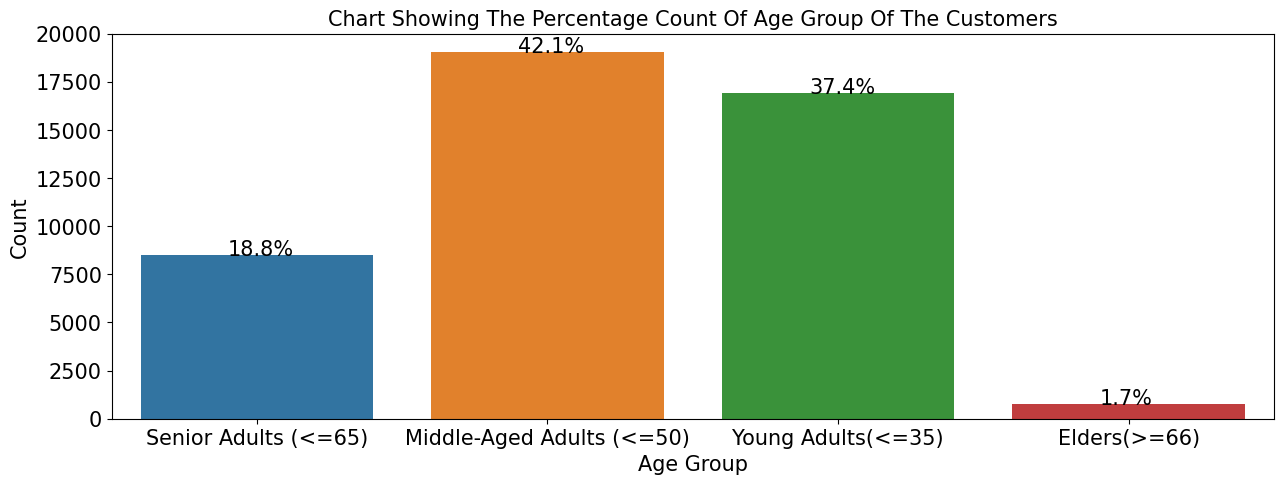

In [17]:

# Age Group Visualization

plt.figure(figsize=(15,5))
ax = sns.countplot(x=df['age_group'], data=df)
plt.xticks(size=15)
plt.xlabel('Age Group', size=15)
plt.yticks(size=15)
plt.ylabel('Count', size=15)
plt.title('Chart Showing The Percentage Count Of Age Group Of The Customers', size=15)

# Calculate percentages

total = float(len(df['age_group']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)

plt.show()

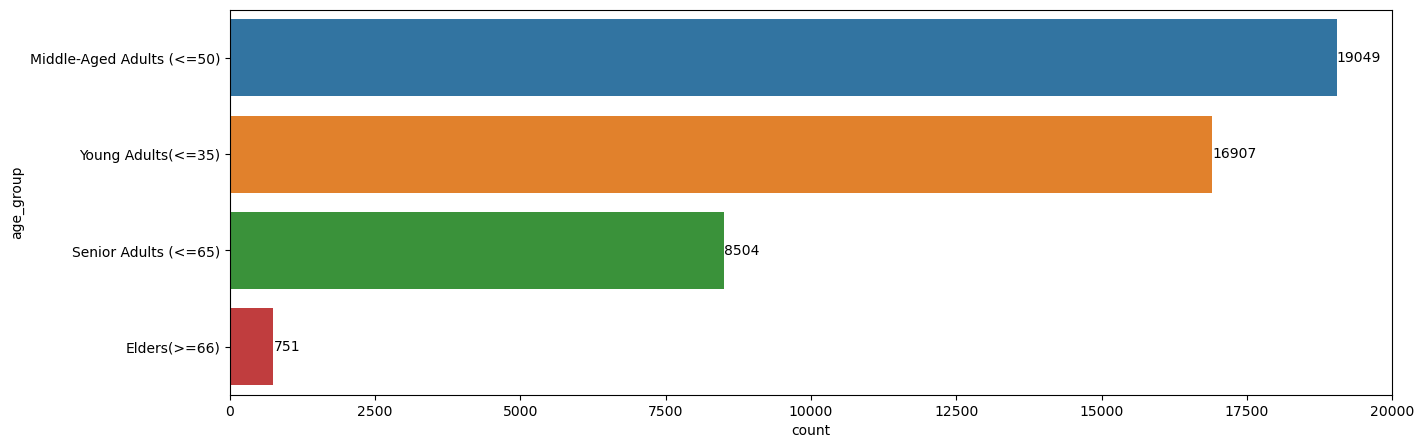

In [18]:
# Distribution Of Customers Age Group

plt.figure(figsize=(15,5))
ax = sns.countplot(y=df["age_group"], order=df["age_group"].value_counts(ascending=False).index)
values = df['age_group'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

### Narration:



According to the provided chart, the customers are categorized into four age groups, namely "Young Adult(<=35)," "Middle-Aged-Adults(<=50)", "Senior Adults(<=65)",  and "Elders"(>=66). Amongst these age groups, the "Middle-Aged-Adults" category has the highest count, with 19049 customers. The "Young Adult" category is the second-highest, with 16907 customers, while the "Senior Adult" category accounts for 8504 customers. The "Elders" category has the lowest count of 751 customers.


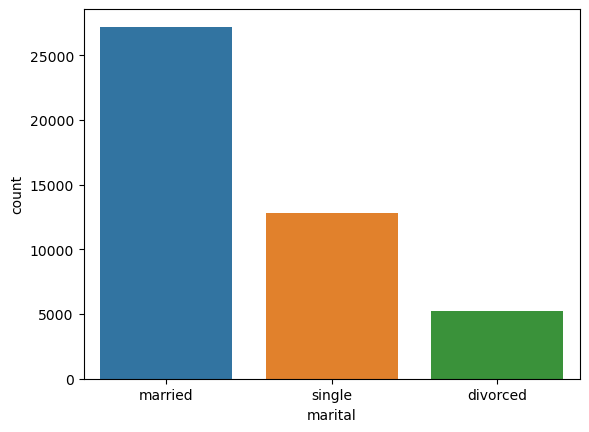

In [19]:
# Analysis On The Marital Status Among The Customers

sns.countplot(x="marital", data=df);

In [20]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

### Narration:

The "marital" feature refers to the marital status of the customers, and the possible values are "married," "divorced," or "single. The chart above shows that majority of the customers are "married," with a count of 27214 individuals. The category of "single" customers comes second, with a count of 12790 individuals, while the category of "divorced" customers is the smallest, with a count of 5207 individuals.

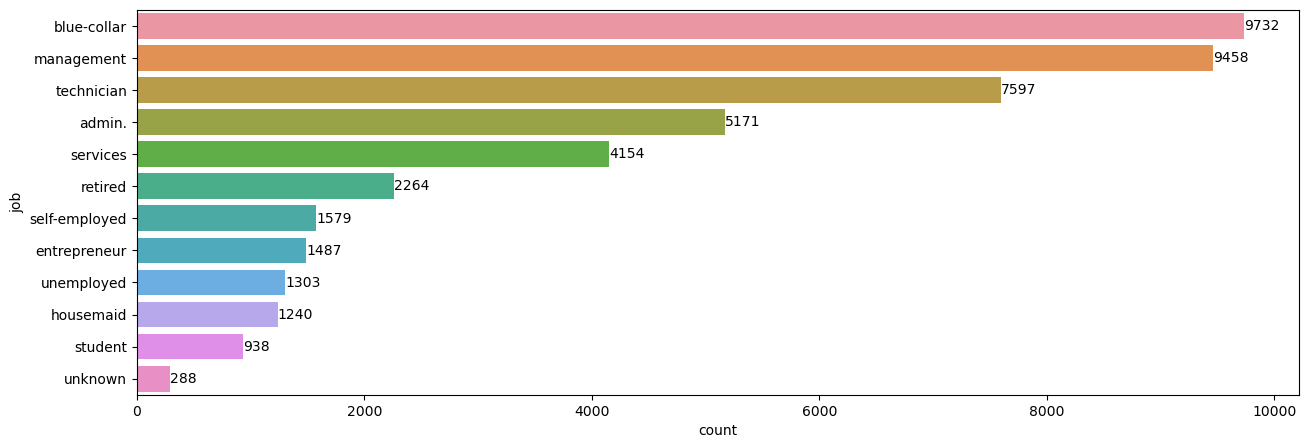

In [21]:
# Distribution Of Job Types Among The Customers

plt.figure(figsize=(15,5))
ax = sns.countplot(y=df["job"], order=df["job"].value_counts(ascending=False).index)
values = df['job'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

### Narration:


The above chart displays the distribution of job types among the customer base. The highest number of customers belong to the blue-collar category with a total count of 9732. Management constitutes the second highest category with 9458 customers, followed by technicians at 7597 and administrative personnel at 5171. The 'services' category includes 4154 customers, and retired individuals account for 2264 of the total customer base. 'Self-employed' and 'entrepreneur' categories consist of 1579 and 1487 customers, respectively. There are 1303 unemployed individuals, 1240 housemaids, and 938 students in the customer base. The 'unknown' category represents the smallest group with only 288 individuals.



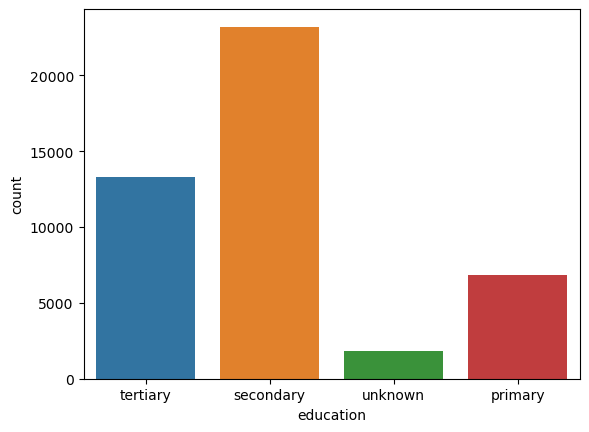

In [22]:
# Analysis On Education Level Among The Customers

sns.countplot(x="education", data=df);

In [23]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

### Narration:

The "education" feature shows the level of education of the customer. According to the provided chart, the highest count of customers fall under the "secondary" category, with a count of 23202, followed by "tertiary," which has a count of 13301. "Primary" education level customers are comparatively lower in count, with a count of 6851, while a fraction of customers (a count of 1857) has unknown education input.


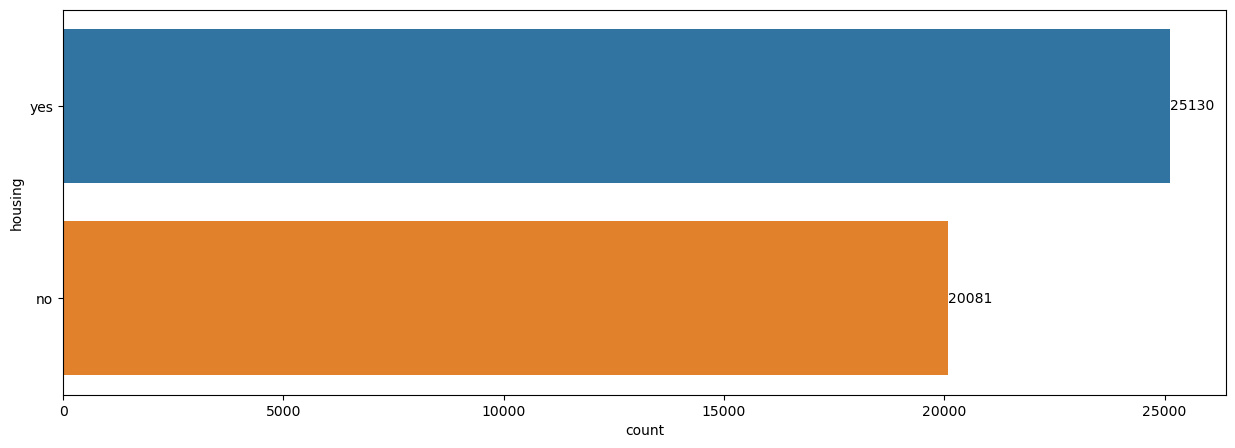

In [24]:
# Analysis Of The Housing Feature Among The Customers

plt.figure(figsize=(15,5))
ax = sns.countplot(y=df["housing"], order=df["housing"].value_counts(ascending=False).index)
values = df['housing'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

### Narration:


The "housing" feature is used to specify whether a customer has a housing loan, with possible values being "yes" or "no." According to the presented chart, the count indicates that a higher number of customers (a count of 25130) have a housing loan, while a smaller group of customers (a count of 20081) do not have a housing loan.



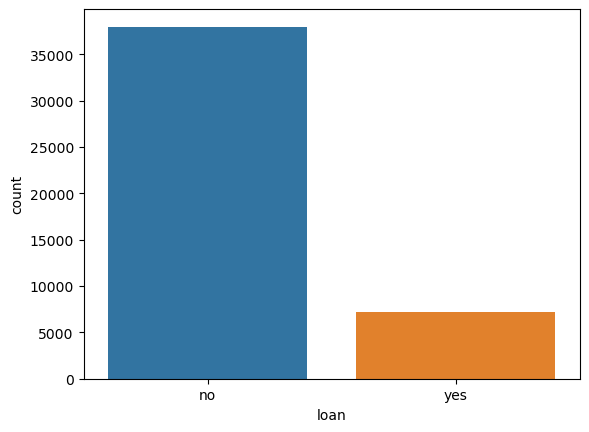

In [25]:
# Analysis On Loan Status Among Customers

sns.countplot(x="loan", data=df);

In [26]:
df['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

### Narration:

The "loan" feature refers to whether a customer has a personal loan, with possible values being "yes" or "no." The given chart demonstrates that majority of the customers (a count of 37967) do not have a personal loan, while a much smaller group of customers (a count of 7244) possess a personal loan.


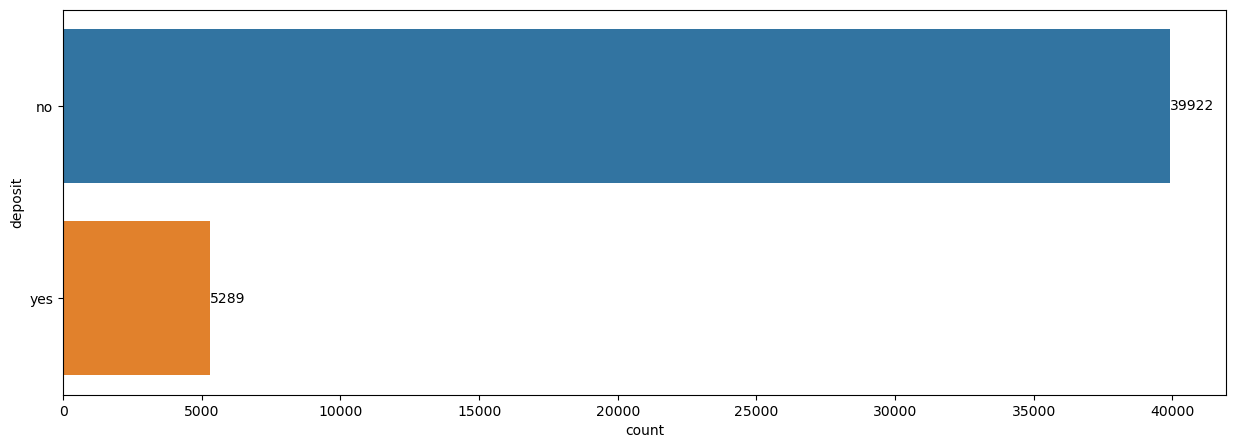

In [27]:
# Analysis On The Deposit Feature Among The Customers

plt.figure(figsize=(15,5))
ax = sns.countplot(y=df["deposit"], order=df["deposit"].value_counts(ascending=False).index)
values = df['deposit'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

### Narration:


The "deposit" feature signifies whether a customer has subscribed to a term deposit, with possible values being "yes" or "no." The chart above indicates that the majority of customers, with a count of 39922, have not subscribed to a term deposit. On the other hand, a small proportion of customers (count of 5289) have subscribed to a term derm deposit.

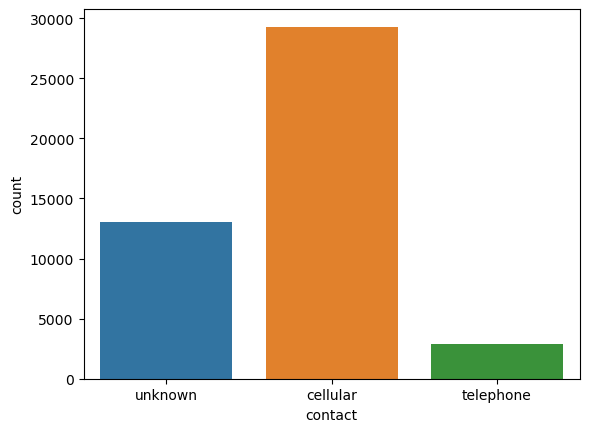

In [28]:
# Analysis On The Contact Method Among The Customers

sns.countplot(x="contact", data=df);

In [29]:
df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

### Narration:

The "contact" feature shows the mode of communication used to establish contact with the customer, including "cellular," "telephone," or "unknown." According to the presented chart, cellular contact mode is used the most, with a count of 29285. The second most popular mode is "unknown," which has a count of 13020. Lastly, telephone mode has the least amount of usage, with only 2906 customers contacted that way.

"Cellular" mode is the most used mode of communication and is likely preferred due to increasing mobile phone usage. "Unknown" mode can be due to several reasons such as capturing data from customers unwilling to share their contact mode or simply missing contact details. The least utilized mode is "telephone," which indicates that customers prefer communication through more modern and convenient channels. Considering this, Nexus bank can modify their communication channels to meet customer preferences effectively, increasing customer satisfaction and improving their overall experience.


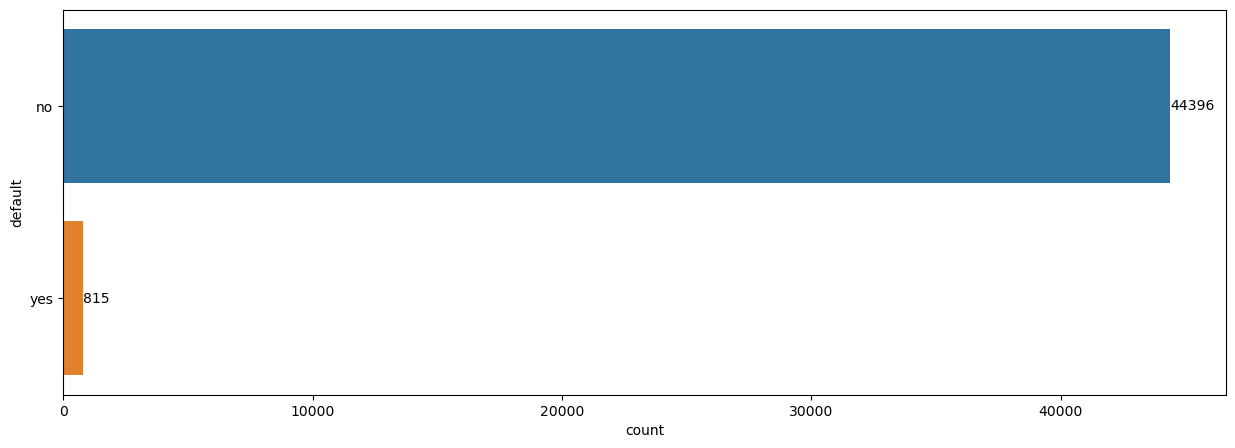

In [30]:
# Analysis On The Default Feature Among The Customers

plt.figure(figsize=(15,5))
ax = sns.countplot(y=df["default"], order=df["default"].value_counts(ascending=False).index)
values = df['default'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

### Narration:


The feature called "default" reveals whether a customer has previously failed to repay a loan or credit card, with possible categories being "yes" or "no." Analyzing the chart, it can be observed that majority of the customers (a count of 44396) have not defaulted on their loans or credit card payments. A relatively small portion of the customers (a count of 815) have defaulted on their payments.

Therefore, customers who fall under the "yes" category may receive less favorable loan terms and interest rates. Conversely, customers with a "no" default status are deemed low-risk borrowers and are likely to receive more favorable loan rates and terms. By considering this feature in their lending decisions, Nexus bank can mitigate risks and protect their financial resources.

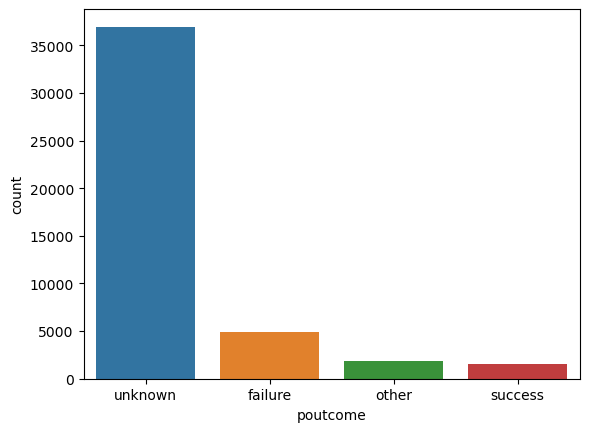

In [31]:
# Analysis On The Poutcome Feature Among The Customers

sns.countplot(x="poutcome", data=df);

In [32]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

### Narration:

The feature named 'poutcome' signifies the result of the previous marketing campaign.


Based on the chart, it can be observed that the highest count belongs to the 'unknown' category, with a count of 36959, 'failure' category with a count of 4901, followed by 'other,' which has a count of 1840. Lastly, the 'success' category has the lowest count, with only 1511 instances recorded in the data.

Majority of the previous campaign outcomes are unknown, indicating the need for further examination of the data and maybe a more comprehensive campaign tracking system in the future. The number of failures also hints at the need to understand the reasons behind such a low outcome and investigate strategies to improve future campaigns. On the other hand, the lower count of successful campaigns might indicate an avenue for improving marketing performance.


### Bivariate Analysis

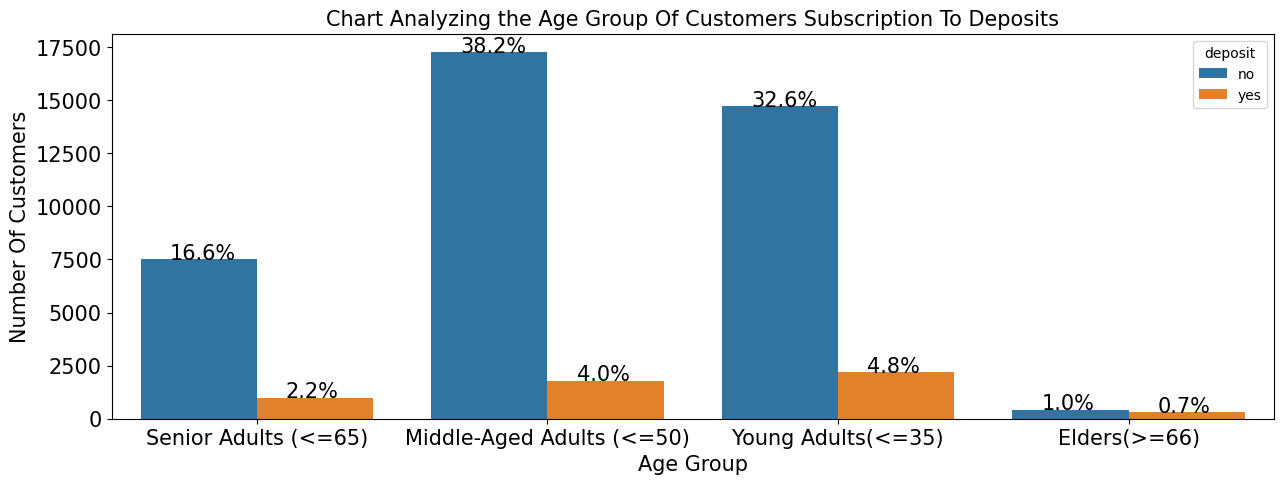

In [33]:
# Analyzing the Age Group Of Customers Subscription To Deposits.

plt.figure(figsize=(15,5))
ax = sns.countplot(x=df['age_group'], hue='deposit', data=df)
plt.xticks(size=15)
plt.xlabel('Age Group', size=15)
plt.yticks(size=15)
plt.ylabel('Number Of Customers', size=15)
plt.title('Chart Analyzing the Age Group Of Customers Subscription To Deposits', size=15);

# Calculate percentages

total = float(len(df['age_group']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)


### Narration:


The chart above provides an analysis of the different age groups of customers who are subscribing to deposits. It highlights the proportion of people in each age group who have opted for (Yes) or against (No) such subscriptions. Here is a detailed breakdown of the findings:

1. Middle-Aged-Adults: This group had the highest overall participation in the survey. Out of this group, 38.2% of customers chose not to subscribe to deposits (No), while a significantly smaller portion, 4%, indicated they were subscribing to deposits (Yes).

2. Young Adults: This was the second-largest group in the analysis. Among Young Adults, 32.6% did not subscribe to deposits (No), and 4.8% of them chose to subscribe (Yes). While they have a slightly higher percentage of subscribers compared to the middle-aged group, the majority still chose not to participate.

3. Senior Adults: As the third most significant group, 16.6% of Senior Adults did not subscribe to deposits (No), and a minor 2.2% of them did subscribe (Yes). With a smaller percentage of subscribers than the previous two groups, senior adults showed a relatively lower interest in deposit subscriptions.

4. Elders: Representing the smallest age group in the analysis, 1% of elders decided against subscribing to deposits (No), and 0.7% showed interest and subscribed (Yes). This group had the lowest overall participation and the lowest percentage of customers subscribing to deposits.

- Additionally, the chart reveals that interest in deposit subscriptions decreases as age increases, with the highest percentage of deposit subscribers found among Young Adults and the lowest among Elders.

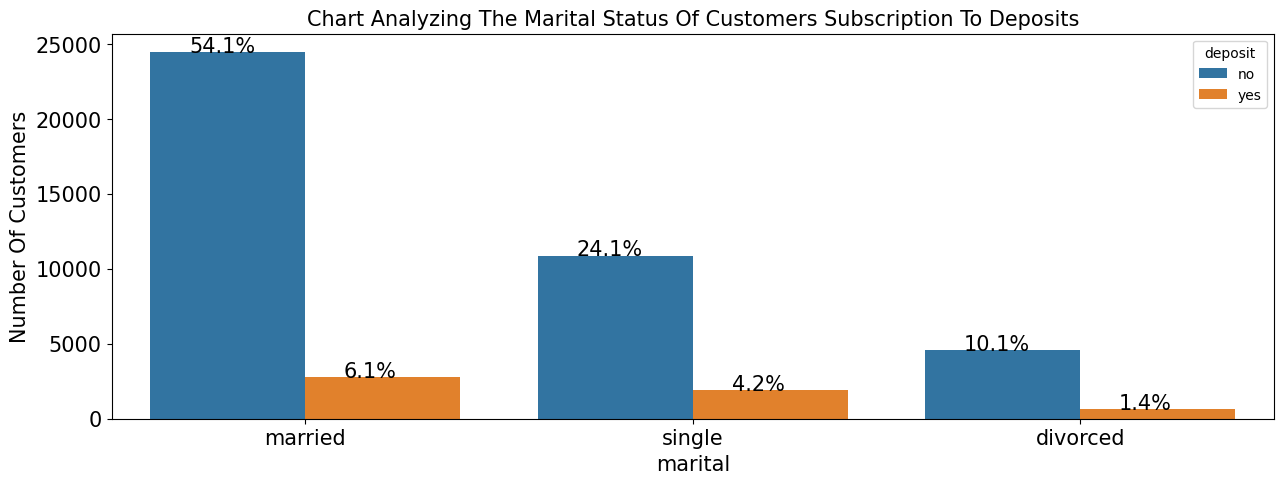

In [34]:
# Analyzing The Marital Status Of Customers Subscription To Deposits.

plt.figure(figsize=(15,5))
ax = sns.countplot(x=df['marital'], hue='deposit', data=df)
plt.xticks(size=15)
plt.xlabel('marital', size=15)
plt.yticks(size=15)
plt.ylabel('Number Of Customers', size=15)
plt.title('Chart Analyzing The Marital Status Of Customers Subscription To Deposits', size=15);

# Calculate percentages

total = float(len(df['marital']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)

     

### Narration:

The chart above shows the analysis of customer marital status and their subscription to deposits. There are three different categories of marital status, including "married," "single," and "divorced".

From the data represented in the chart, we can observe that among the married customers, 54.1% of them do not have  deposits subscription, while 6.1% of them do hold such subscriptions. In the case of single customers, the proportion without deposits subscription is 24.1%, whereas 4.2% of them have subscribed to deposits. Lastly, among the divorced customer group, 10.1% of them are not subscribed to deposits, while a smaller percentage, 1.4%, has opted for deposit subscription services.

In summary, the chart offers insights into the relationship between customers' marital status and their subscription to deposits. Married customers are the largest group among those without deposit subscriptions, they are aslo the largest group with subscriptions, while the divorced group has the lowest percentage of users with  deposit subscriptions.

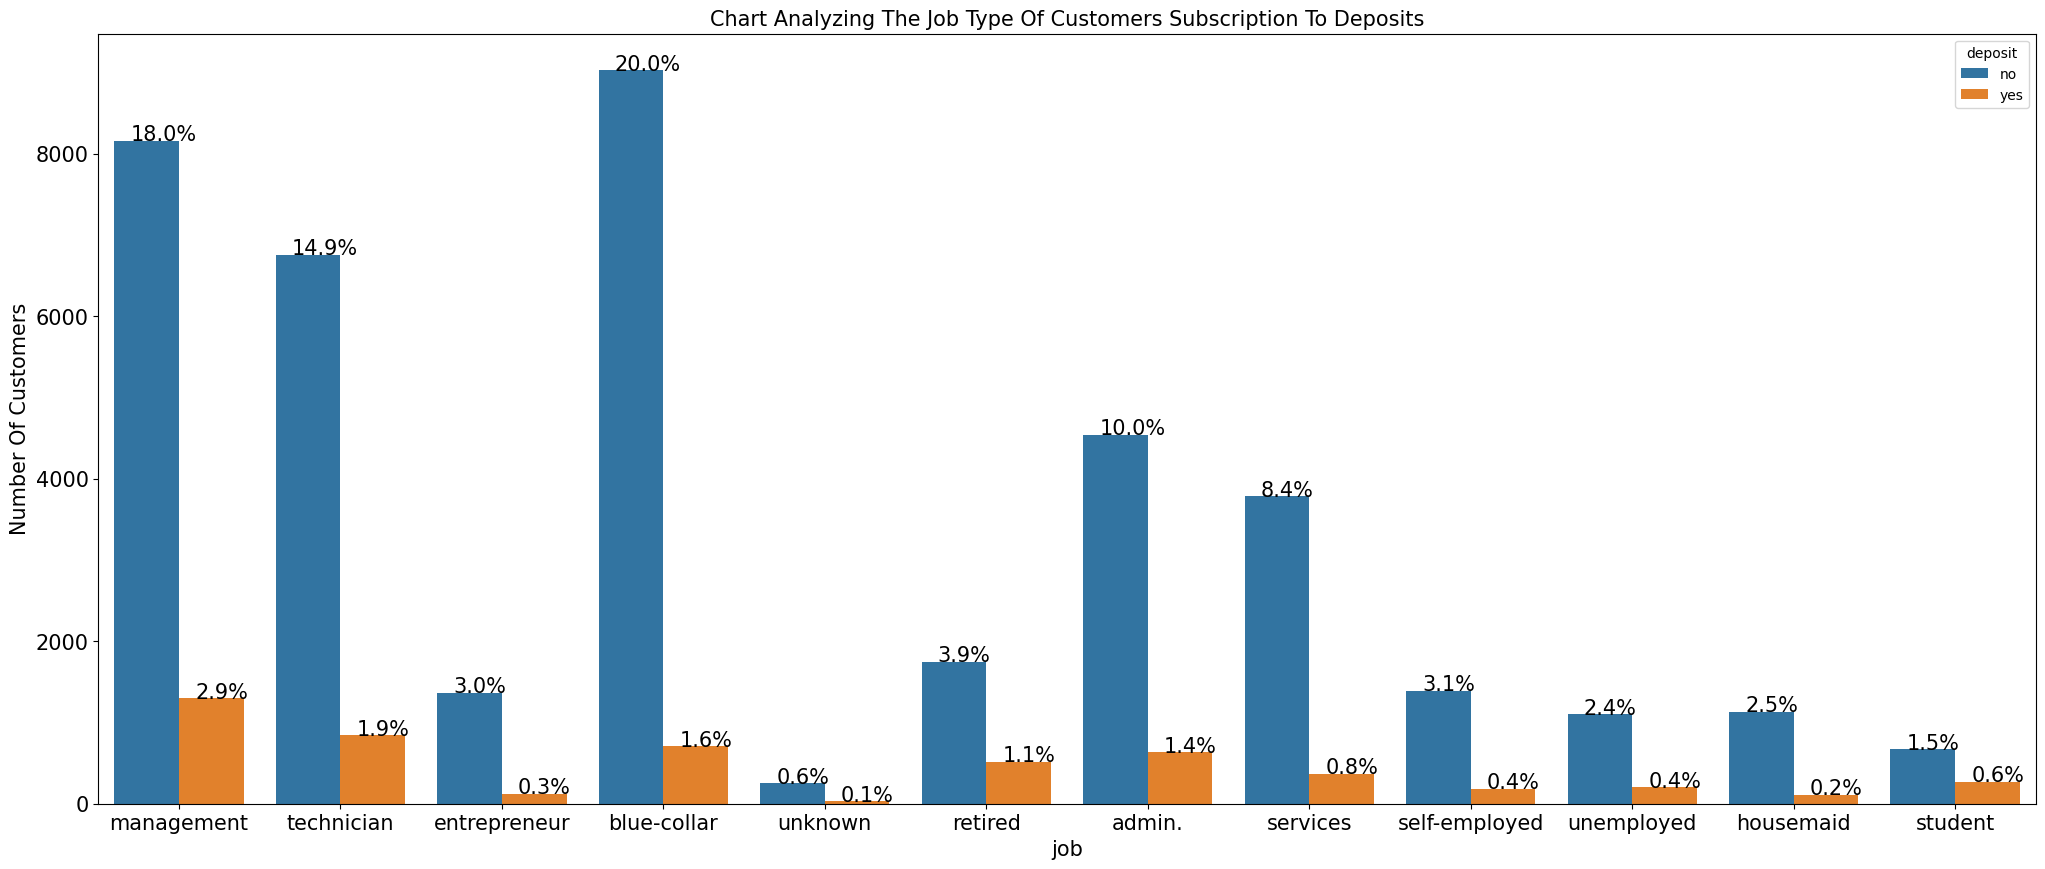

In [35]:
# Analyzing The Job Type Of Customers Subscription To Deposits.


plt.figure(figsize=(25,10))
ax = sns.countplot(x=df['job'], hue='deposit', data=df)
plt.xticks(size=15)
plt.xlabel('job', size=15)
plt.yticks(size=15)
plt.ylabel('Number Of Customers', size=15)
plt.title('Chart Analyzing The Job Type Of Customers Subscription To Deposits', size=15);


# Calculate percentages

total = float(len(df['job']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)



### Narration:

The chart provided analyzes customers' job types in relation to their subscription to deposits. The data is categorized into "yes" and "no," representing customers who have and haven't subscribed, respectively. The percentages for each job type's subscription status are:

1. Management: 18% of customers with this job type are non-subscribers, while 2.9% are subscribers.
2. Technician: 14.9% non-subscribers and 1.9% subscribers.
3. Entrepreneur: 3.0% non-subscribers and 0.3% subscribers.
4. Blue Collar: 20.0% non-subscribers and 1.6% subscribers.
5. Unknown: 0.6% non-subscribers and 0.1% subscribers.
6. Retired: 3.9% non-subscribers and 1.1% subscribers.
7. Admin: 10% non-subscribers and 1.4% subscribers.
8. Services: 8.4% non-subscribers and 0.8% subscribers.
9. Self-employed: 3.1% non-subscribers and 0.4% subscribers.
10. Unemployed: 2.4% non-subscribers and 0.4% subscribers.
11. Housemaid: 2.5% non-subscribers and 0.2% subscribers.
12. Student: 1.5% non-subscribers and 0.6% subscribers.

This data indicates the proportion of customers from different job profiles who have or haven't subscribed to deposits. Nexus Bank can identify trends and tailoring marketing strategies to target customers based on their job types.

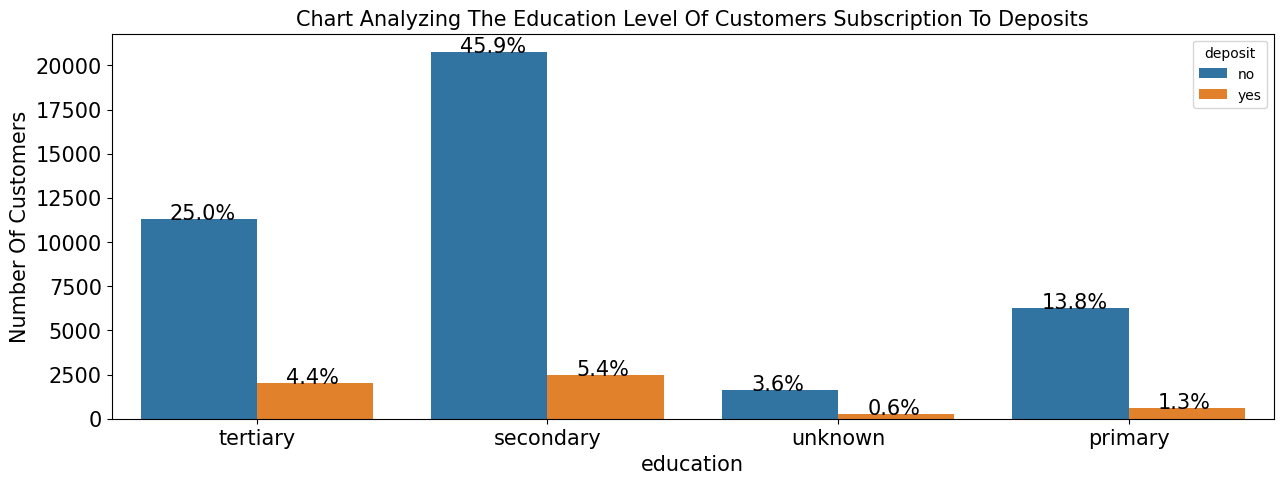

In [36]:
# Analyzing The Education Level Of Customers Subscription To Deposits.


plt.figure(figsize=(15,5))
ax = sns.countplot(x=df['education'], hue='deposit', data=df)
plt.xticks(size=15)
plt.xlabel('education', size=15)
plt.yticks(size=15)
plt.ylabel('Number Of Customers', size=15)
plt.title('Chart Analyzing The Education Level Of Customers Subscription To Deposits', size=15)


# Calculate percentages

total = float(len(df['education']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)



### Narration:

The chart provided examines the education level of customers and their subscription to deposits. Four categories are analyzed in the data: primary, secondary, tertiary, and unknown education levels.

In the tertiary education category, 25% of customers did not subscribe to deposit accounts, while 4.4% did. As for those with a secondary education, 45.9% did not subscribe and 5.4% did. Among the customers with an unknown education level, 3.6% did not subscribe and 0.6% did. Lastly, for the primary education category, 13.8% of customers did not opt for a deposit account, and 1.3% did subscribe.

In summary, Customers with secondary education are the largest group, followed by those with tertiary, primary, and unknown education levels.


### Narration:




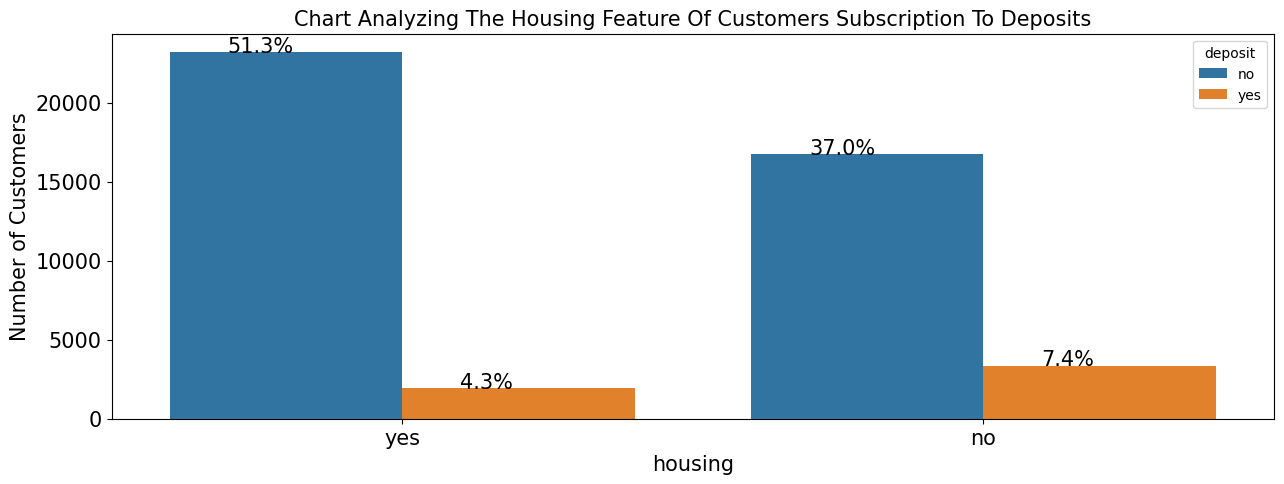

In [37]:
# Analyzing The Housing Feature Of Customers Subscription To Deposits.


plt.figure(figsize=(15,5))
ax = sns.countplot(x=df['housing'], hue='deposit', data=df)
plt.xticks(size=15)
plt.xlabel('housing', size=15)
plt.yticks(size=15)
plt.ylabel('Number of Customers', size=15)
plt.title('Chart Analyzing The Housing Feature Of Customers Subscription To Deposits', size=15)


# Calculate percentages

total = float(len(df['housing']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)



### Narration:


The chart provided analyzes the relationship between the customers' housing status and their subscription to deposits. The housing feature reveals whether a customer has a housing loan or not, represented by "yes" or "no."

According to the chart, among customers who have subscribed to deposits (Yes), 4.3% have a housing loan (yes), and 51.3% also have a housing loan but do not subscribe to deposits. In contrast, among those have no housing loan, 37.0% have not subscribe while 7.4% have subscribed deposits.

In summary, the chart demonstrates that a higher percentage of customers without housing loans have subscribed to deposits compared to those with housing loans.


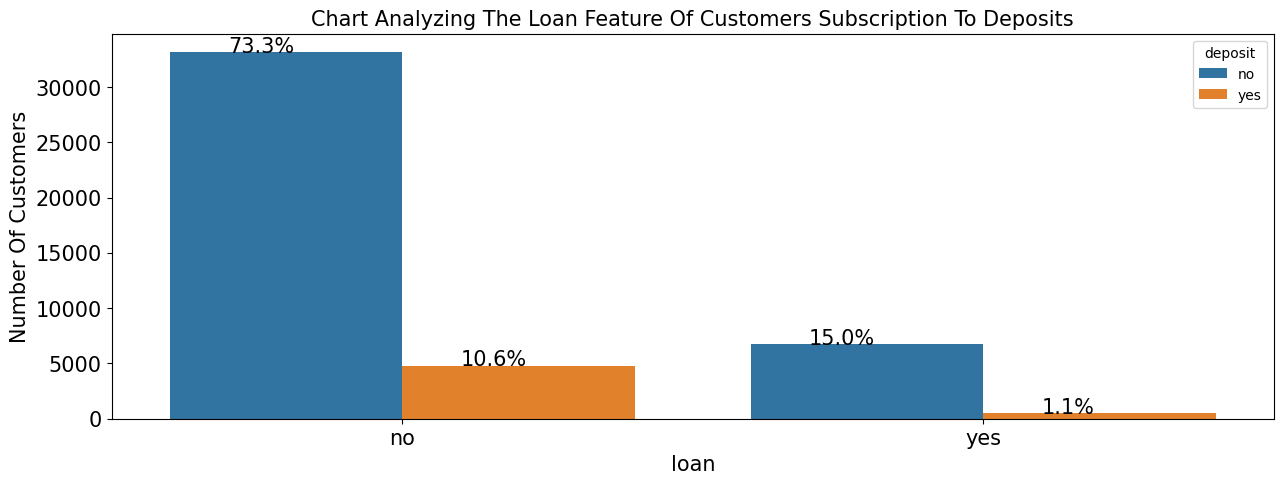

In [38]:
# Analyzing The Loan Feature Of Customers Subscription To Deposits.


plt.figure(figsize=(15,5))
ax = sns.countplot(x=df['loan'], hue='deposit', data=df)
plt.xticks(size=15)
plt.xlabel('loan', size=15)
plt.yticks(size=15)
plt.ylabel('Number Of Customers', size=15)
plt.title('Chart Analyzing The Loan Feature Of Customers Subscription To Deposits', size=15)


# Calculate percentages

total = float(len(df['loan']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)



### Narration:


The chart provided examines the relationship between customers' subscription to deposits and whether they have a personal loan or not. The loan feature is categorized into "yes" or "no" responses. 

From the analysis, 73.3% of customers without a loan ("no" category) have not subscribed to deposits, whereas only 10.6% of the same category have subscribed to a deposit. In contrast, 15% of customers with a loan ("yes" category) have not subscribed to deposits, and just a small fraction, 1.1%, of them have subscribed to deposits.

In summary, the chart reveals that customers without loans have the highest subscription to deposits, and an even smaller percentage of customers with loans have subscribed to deposits.





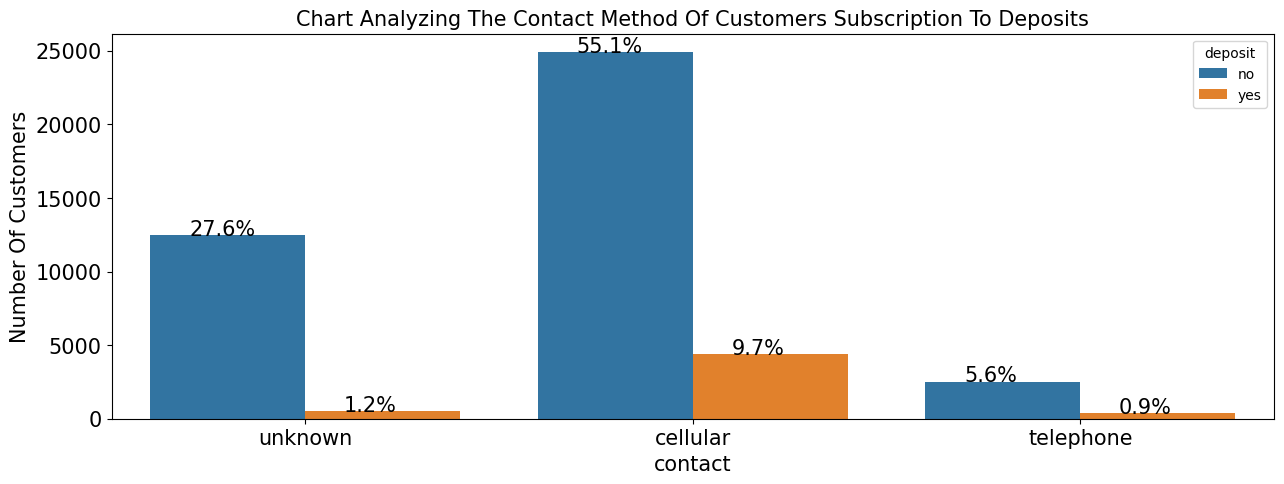

In [39]:
# Analyzing The Contact Method Of Customers Subscription To Deposits.


plt.figure(figsize=(15,5))
ax = sns.countplot(x=df['contact'], hue='deposit', data=df)
plt.xticks(size=15)
plt.xlabel('contact', size=15)
plt.yticks(size=15)
plt.ylabel('Number Of Customers', size=15)
plt.title('Chart Analyzing The Contact Method Of Customers Subscription To Deposits', size=15)

# Calculate percentages

total = float(len(df['contact']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)



### Narration:

The chart above examines the method of contact used to communicate with customers regarding their subscription to deposits. It presents the data in terms of "yes" and "no" responses for different types of contact methods: cellular, telephone, and unknown. 

For the unknown contact method category, 27.6% of the customers did not subscribe to deposits, while only 1.2% responded with a "yes." In the cellular contact method, 55.1% of customers did not subscribe to deposits, but 9.7% did. Lastly, in the telephone contact method, 5.6% did not subscribe to deposits and 0.9% did.

In summary, the analysis shows that cellular contact was the most successful method for customer subscriptions to deposits.

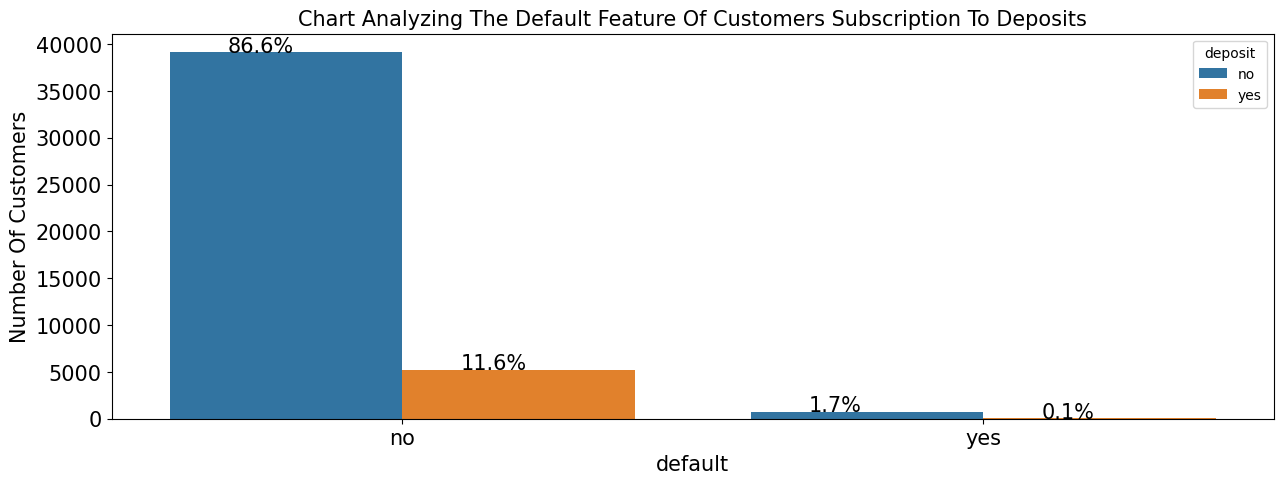

In [40]:
# Analyzing The Default Feature Of Customers Subscription To Deposits.


plt.figure(figsize=(15,5))
ax = sns.countplot(x=df['default'], hue='deposit', data=df)
plt.xticks(size=15)
plt.xlabel('default', size=15)
plt.yticks(size=15)
plt.ylabel('Number Of Customers', size=15)
plt.title('Chart Analyzing The Default Feature Of Customers Subscription To Deposits', size=15)

# Calculate percentages

total = float(len(df['default']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)




### Narration:

The chart above analyzes the relationship between the customers' subscription to deposits and their past default history on loans or credit card payments. The data in the chart is categorized into "yes" or "no" based on whether the customers have previously defaulted on a loan or credit card payment.

According to the chart, 86.6% of customers with no previous default history have not subscribed to deposits, while 11.6% of them have subscribed. Meanwhile, for customers with a previous default history, 1.7% have chosen not to subscribe to deposits and 0.1% have subscribed.

In summary, the chart implies that customers without any past default incidents are more likely to subscribe to deposits compared to those with a previous history of defaults.

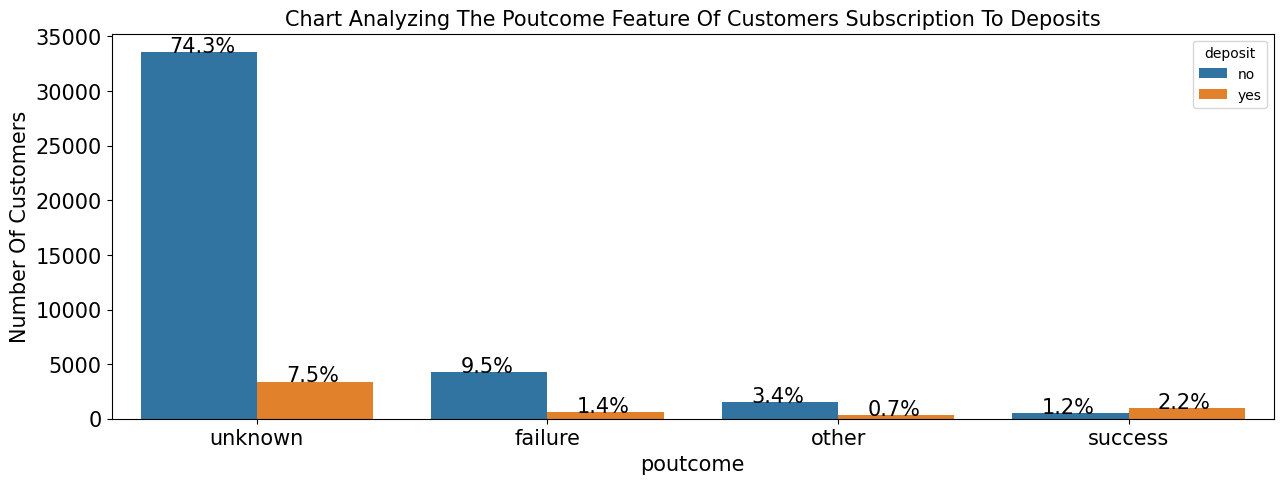

In [41]:
# Analyzing The Poutcome Feature Of Customers Subscription To Deposits.


plt.figure(figsize=(15,5))
ax = sns.countplot(x=df['poutcome'], hue='deposit', data=df)
plt.xticks(size=15)
plt.xlabel('poutcome', size=15)
plt.yticks(size=15)
plt.ylabel('Number Of Customers', size=15)
plt.title('Chart Analyzing The Poutcome Feature Of Customers Subscription To Deposits', size=15)


# Calculate percentages

total = float(len(df['poutcome']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)




### Narration:

The given chart analyzes the relationship between the outcome of the previous marketing campaign (referred to as 'poutcome') and the customer's tendency to subscribe to deposits. The 'poutcome' feature has four categories: unknown, failure, other, and success.

1. Unknown:
   - 74.3% of customers with an unknown poutcome did not subscribe to deposits (No)
   - 7.5% of customers with an unknown poutcome subscribed to deposits (Yes)

2. Failure:
   - 9.5% of customers with a failed poutcome did not subscribe to deposits (No)
   - 1.4% of customers with a failed poutcome subscribed to deposits (Yes)

3. Other:
   - 3.4% of customers with an other poutcome did not subscribe to deposits (No)
   - 0.7% of customers with an other poutcome subscribed to deposits (Yes)

4. Success:
   - 1.2% of customers with a successful poutcome did not subscribe to deposits (No)
   - 2.2% of customers with a successful poutcome subscribed to deposits (Yes)

In summary, the chart presents the proportion of customers who subscribed or did not subscribe to deposits, based on the poutcome from the previous marketing campaign.


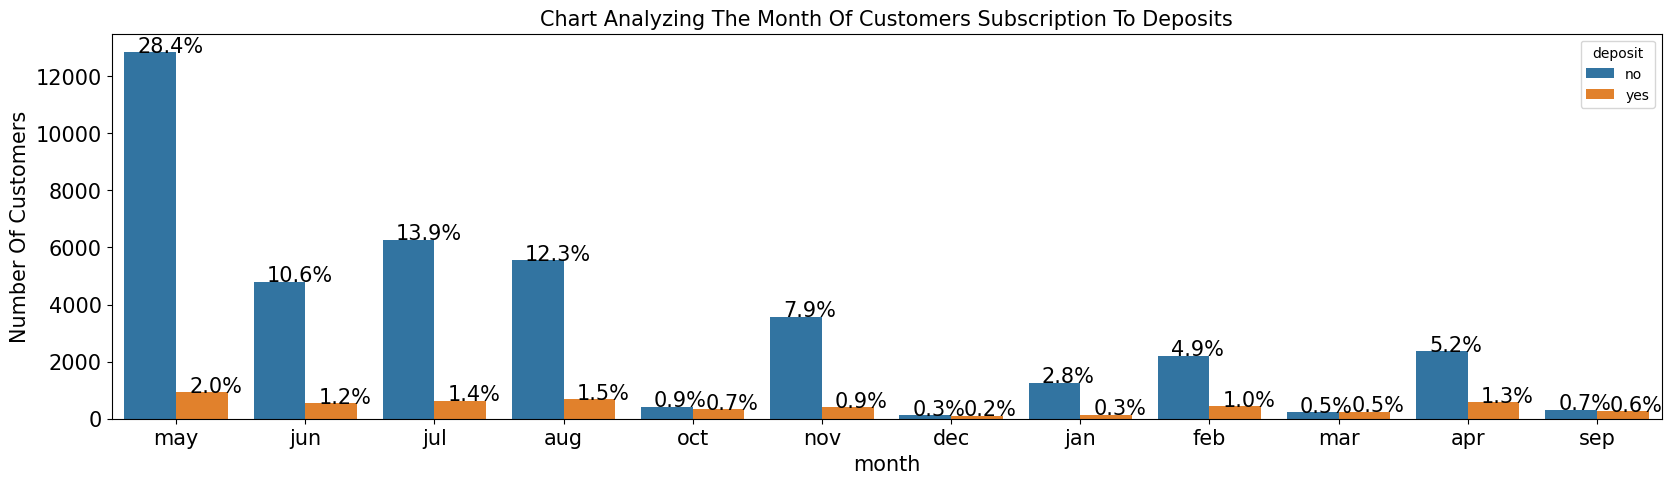

In [42]:
# Analyzing The Month Of Customers Subscription To Deposits.

plt.figure(figsize=(20,5))
ax = sns.countplot(x=df['month'], hue='deposit', data=df)
plt.xticks(size=15)
plt.xlabel('month', size=15)
plt.yticks(size=15)
plt.ylabel('Number Of Customers', size=15)
plt.title('Chart Analyzing The Month Of Customers Subscription To Deposits', size=15)



# Calculate percentages

total = float(len(df['month']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)



### Narration:


The chart above provides an analysis of customer subscriptions to deposits on a monthly basis. Here is a detailed explanation of the findings:

- May: In May, there were 28.4% of customers who chose not to subscribe, while 2% of customers subscribed. This indicates that majority of the customers did not opt for deposit subscriptions during this month.
- June: The month of June witnessed 10.6% of customers not subscribing to deposits, in contrast to the 1.2% who opted in for a deposit plan.
- July: July had a higher ratio of non-subscribers at 13.9%, with only 1.4% of customers saying yes to deposits subscriptions.
- August: In August, 12.3% of customers decided against deposit subscriptions, and 1.5% of them subscribed.
- September: September had 0.7% of customers not subscribing and 0.6% of customers choosing to subscribe.
- October: October's numbers were also close, with 0.9% non-subscribers and 0.7% subscribers to deposits.
- November: In November, 7.9% of customers chose not to subscribe to deposits, while 0.9% decided to subscribe.
- December: December had the lowest ratio of non-subscribers at 0.3%, and 0.2% of customers opted in for deposits.
- January: January witnessed 2.8% of customers not subscribing to deposit plans, as opposed to the 0.3% who chose to subscribe.
- February: In February, 4.9% of customers did not subscribe, while 1% decided to opt for a deposits.
- March: March had an equal distribution with 0.5% of customers subscribing to deposit plans, and the same percentage not subscribing.
- April: In April, 5.2% of customers chose not to subscribe to deposits, and 1.3% decided to subscribe.

- Upon extensive analysis of the data, it becomes apparent that the month of May had the highest number of non-subscriptions and also the highest number of subscriptions  while December had the lowest percentage of non-subscriptions and lowest number of subscriptions. Overall, the deposit plan subscriptions maintained a lower percentage compared to non-subscribers throughout the year.

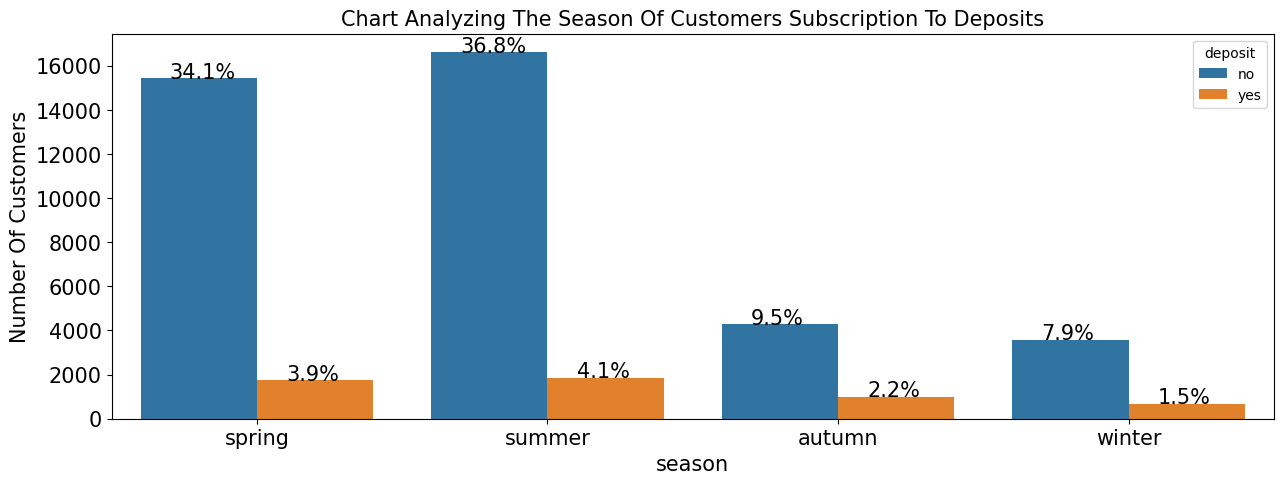

In [43]:
# Analyzing The Season Of Customers Subscription To Deposits.


plt.figure(figsize=(15,5))
ax = sns.countplot(x=df['season'], hue='deposit', data=df)
plt.xticks(size=15)
plt.xlabel('season', size=15)
plt.yticks(size=15)
plt.ylabel('Number Of Customers', size=15)
plt.title('Chart Analyzing The Season Of Customers Subscription To Deposits', size=15)



total = float(len(df['season']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)




### Narration:


According to the chart provided, the data showcases the percentage of customers subscribing to deposits during each season and categorizes their responses into two groups - 'Yes' and 'No'. The numbers in the chart indicate a higher number of customers subscribing during summer, followed by spring, autumn, and winter.

During the summer season, the chart illustrates that 36.8% of the customers opted not to subscribe to deposits, while only 4.1% decided to subscribe. This suggests that summer is the most popular season for subscription, although with the highest number of customers choosing not to subscribe.

In the spring season, 34.1% of the customers did not subscribe to deposits, and 3.9% chose to subscribe. This indicates that spring is the second most popular season for deposit subscriptions, with a similar pattern of a majority opting against subscription.

As for the autumn season, only 9.5% of the customers opted not to subscribe, while 2.2% decided to subscribe to deposits. The relatively lower percentages show a noticeable drop in both subscription and non-subscription compared to the summer and spring seasons.

Lastly, during the winter season, 7.9% of the customers chose not to subscribe to deposits, and only 1.5% subscribed. This highlights winter as the least popular season for deposit subscriptions.

In summary, the chart displays the trend of deposit subscriptions among customers across different seasons. Despite a higher percentage of non-subscribers during each season, the data suggests an inclination towards deposit subscriptions during warmer months, with a gradual decrease as the seasons transition into colder months.


### Multivariate Analysis

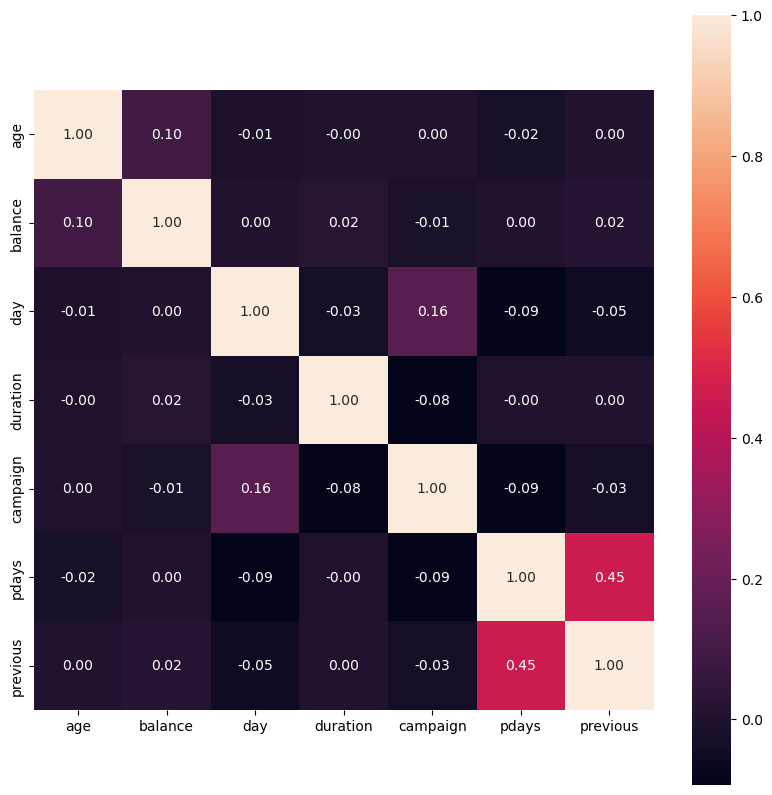

In [44]:
# Correlation matrix

plt.figure(figsize = (10,10))

hm = sns.heatmap(df.corr(), cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws= {'size': 10})

### Narration:


In the given table, various factors have different levels of correlation with a specific outcome. A correlation signifies the strength and direction of a relationship between two variables. A positive correlation indicates that as one variable increases, the other also tends to increase, while a negative correlation shows that as one variable increases, the other tends to decrease. A correlation value close to 0 suggests that there is no significant relationship between the variables.

1. Age: It has a correlation of 0.00, which means that there is no apparent relationship between age and the outcome. There isn't any evidence to support that an increase or decrease in age has any significant effect on the outcome.

2. Balance: With a correlation of 0.02, the relationship between balance and the outcome is weakly positive. This suggests that there may be a very slight increase in the outcome as the balance increases. However, given the low correlation value, this relationship is not very strong.

3. Day: The table shows a negative correlation of -0.05 between the day and the outcome. This indicates that as the day progresses, the outcome tends to decrease slightly. However, this is still a rather weak relationship, and other factors may contribute more significantly to the outcome.

4. Duration: With a correlation of 0.00, duration has no discernible relationship with the outcome. This implies that the length of time (duration) does not play a significant role in determining the outcome.

5. Campaign: The correlation of -0.03 for campaign indicates a weak negative relationship. This means that, to a minimal extent, an increase in campaign efforts could lead to a decrease in the outcome. Again, this correlation is low, and the relationship is not very pronounced.

6. Pdays: The factor 'pdays' has a more substantial positive correlation of 0.45. This suggests that as the number of 'pdays' increases, the outcome also tends to increase. This correlation indicates a more meaningful relationship between these two variables compared to the others in the table.

7. Previous: With a correlation of 1, 'previous' has a perfect positive relationship with the outcome. This means that as the 'previous' value increases, the outcome will also increase. A perfect correlation demonstrates that this variable may have a substantial impact on the outcome.

In summary, while 'pdays' and 'previous' exhibit stronger and meaningful correlations with the outcome, other variables like age, balance, day, duration, and campaign show weak relationships. However, it is essential to consider that correlation does not imply causation, meaning these factors might not be directly responsible for the changes in the outcome. A more in-depth analysis would be necessary to confirm any causative factors that might be affecting the outcome.



### Feature Engineering

In [45]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,season,age_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,spring,Senior Adults (<=65)
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,spring,Middle-Aged Adults (<=50)
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,spring,Young Adults(<=35)
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,spring,Middle-Aged Adults (<=50)
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,spring,Young Adults(<=35)


In [46]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit', 'season', 'age_group'],
      dtype='object')

In [47]:
from sklearn.preprocessing import LabelEncoder

# Label Encoder
encoder = LabelEncoder() # Method Initialization


# Loping for columns except Survived

for c in df.columns[1:]:
    if(df[c].dtype=='object'):
        df[c] = encoder.fit_transform(df[c])
    else:
        df[c] = df[c]
        
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,season,age_group
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0,1,2
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0,1,1
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0,1,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0,1,1
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0,1,3


In [48]:
df1 = df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'season']]

label = df[['deposit']]

In [49]:
df1.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
season       int64
dtype: object

In [50]:
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'season'],
      dtype='object')

In [51]:
# Dealing with outliers - 'age, 'balance', 'duration'


# Normalize the data

scaler = MinMaxScaler()

df1['scaled_age'] = scaler.fit_transform(df1['age'].values.reshape(-1,1))
df1['scaled_balance'] = scaler.fit_transform(df1['balance'].values.reshape(-1,1))
df1['scaled_duration'] = scaler.fit_transform(df1['duration'].values.reshape(-1,1))


df1.drop(['age', 'balance', 'duration'], axis=1, inplace=True)

df1.head()

,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,season,scaled_age,scaled_balance,scaled_duration
0,4,1,2,0,1,0,2,5,8,1,-1,0,3,1,0.519481,0.092259,0.053070
1,9,2,1,0,1,0,2,5,8,1,-1,0,3,1,0.337662,0.073067,0.030704
2,2,1,1,0,1,1,2,5,8,1,-1,0,3,1,0.194805,0.072822,0.015453
3,1,1,3,0,1,0,2,5,8,1,-1,0,3,1,0.376623,0.086476,0.018707
4,11,2,3,0,0,0,2,5,8,1,-1,0,3,1,0.194805,0.072812,0.040260


### Machine Learning

### Supervised Learning

In [52]:
# Split the dataset into training and testing sets

X_train,X_test,y_train,y_test = train_test_split(df1, label, test_size=0.2, random_state=42)


In [53]:
# Model Building


# Logistic Regression


lr = LogisticRegression()

lr.fit(X_train, y_train)

ly_pred = lr.predict(X_test)


print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy: 0.8795753621585757
Precision: 0.5384615384615384
Recall: 0.012832263978001834
F1-score: 0.025067144136078783
AUC-ROC: 0.5056616048260231


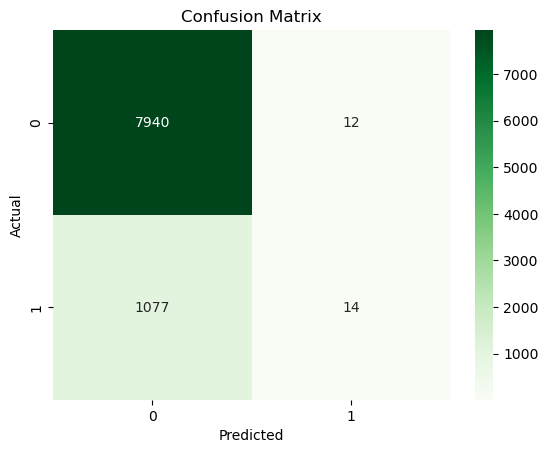

In [54]:
# Create a confusion matrix

lrcm = confusion_matrix(y_test, ly_pred)

# Visualize the confusion matrix

sns.heatmap(lrcm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Narration:


This classification model predicted 7940 customers correctly as not subscribing to deposits, while it wrongly predicted 1077 customers as not subscribing when they actually did. It also incorrectly predicted 12 customers without subscribing as subscribing to deposits. Additionally, it correctly predicted 14 customers as subscribing to deposits. However, this model performed worse than both the Logistic Regression and Random Forest models.



In [55]:
# Model Building
# Random Forest Classifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfy_pred = rfc.predict(X_test)


print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, rfy_pred))
print("Precision:", precision_score(y_test, rfy_pred))
print("Recall:", recall_score(y_test, rfy_pred))
print("F1-score:", f1_score(y_test, rfy_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfy_pred))

Logistic Regression
Accuracy: 0.901249585314608
Precision: 0.6390449438202247
Recall: 0.41704857928505956
F1-score: 0.5047143649473101
AUC-ROC: 0.6923648329020871


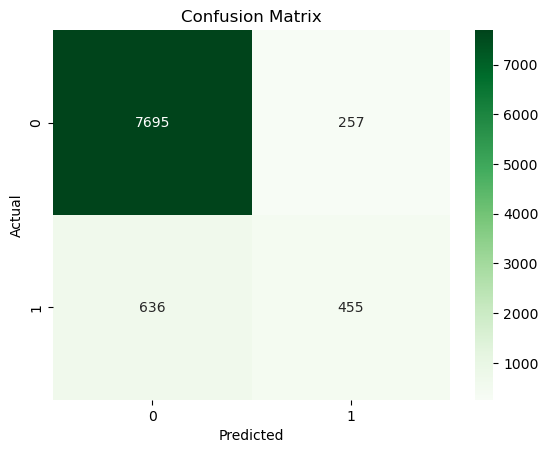

In [56]:
# Create a confusion matrix

rcm = confusion_matrix(y_test, rfy_pred)


# Visualize the confusion matrix

sns.heatmap(rcm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Narration:

This classification model predicted 7694 customers correctly as not subscribing to deposits, while it wrongly predicted 628 customers as not subscribing when they actually did. It also incorrectly predicted 258 customers without subscribing as subscribing to deposits. Additionally, it correctly predicted 463 customers as subscribing to deposits. 

In [57]:
# 8 Machine Learing Algorithms will be applied to the dataset


classifiers =  [[XGBClassifier(), 'XGB Classifier'],
               [RandomForestClassifier(), 'Randowm Forest'],
               [KNeighborsClassifier(), 'K-Nearest Neighbours'], 
               [SGDClassifier(), 'SGD Classifier'], 
               [GaussianNB(), 'Naive Bayes'], 
               [DecisionTreeClassifier(random_state= 42), 'Decision tree'], 
               [LogisticRegression(), 'Logistic Regression']
               ]

In [58]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}



for classifier in classifiers:
    
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    
    
    pred = model.predict(X_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    
    
    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100,2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100,2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100,2)) + '%'])
    
    
    if model_name != classifiers[-1][1]:
        print('')

In [59]:
acc_list

{'XGB Classifier': ['90.7%'],
 'Randowm Forest': ['90.17%'],
 'K-Nearest Neighbours': ['88.27%'],
 'SGD Classifier': ['88.01%'],
 'Naive Bayes': ['82.2%'],
 'Decision tree': ['87.47%'],
 'Logistic Regression': ['87.96%']}

In [60]:
print ('Accuracy Score')
s1 = pd.DataFrame(acc_list)
s1.head()

Accuracy Score


,XGB Classifier,Randowm Forest,K-Nearest Neighbours,SGD Classifier,Naive Bayes,Decision tree,Logistic Regression
0,90.7%,90.17%,88.27%,88.01%,82.2%,87.47%,87.96%


In [61]:
print ('Precision')
s2 = pd.DataFrame(precision_list)
s2.head()

Precision


,XGB Classifier,Randowm Forest,K-Nearest Neighbours,SGD Classifier,Naive Bayes,Decision tree,Logistic Regression
0,64.85%,64.27%,53.42%,50.69%,33.97%,48.15%,53.85%


In [62]:
print ('Recall')
s3 = pd.DataFrame(recall_list)
s3.head()

Recall


,XGB Classifier,Randowm Forest,K-Nearest Neighbours,SGD Classifier,Naive Bayes,Decision tree,Logistic Regression
0,50.05%,41.7%,21.45%,23.56%,50.41%,50.14%,1.28%


In [63]:
print ('ROC Score')
s4 = pd.DataFrame(roc_list)
s4.head()

ROC Score


,XGB Classifier,Randowm Forest,K-Nearest Neighbours,SGD Classifier,Naive Bayes,Decision tree,Logistic Regression
0,73.16%,69.26%,59.44%,60.21%,68.48%,71.37%,50.57%


### Conclusion:



The table above shows the performance of various machine learning algorithms on a classification problem using different performance metrics. The performance metrics evaluated include Accuracy, Precision, Recall, and ROC-AUC Score.

Accuracy measures the proportion of correct predictions made by the model out of all the predictions. The highest value indicates better classification performance. The XGB Classifier produced the highest accuracy score of 90.7%, which makes it the best-performing algorithm in this category.

Precision measures the proportion of true positive predictions that are correct out of all the positive predictions made by the model. The XGB Classifier again produced the highest precision score of 64.85%, indicating that it was the algorithm most likely to produce true positive predictions. 

Recall, also known as sensitivity, measures the proportion of actual positives that the model correctly identifies out of all the actual positives in the dataset. The XGB Classifier performed the best in this category as well, with a recall score of 50.05%.

ROC-AUC Score measures the ability of the model to distinguish between the classes correctly. The value ranges from 0 to 1, with a higher score indicating better classification performance. The XGB Classifier had the highest ROC-AUC Score of 73.16%, followed by the Random Forest algorithm with a score of 69.26%.

It's important to note that Naive Bayes had the highest recall score of 50.41%, but it had the lowest precision score of 33.97%, which means that it was more likely to make false positive predictions. Therefore, it should only be used when recall is a top priority.

In conclusion, the XGB Classifier algorithm outperformed other algorithms in terms of accuracy, precision, and recall. However, the Random Forest algorithm is a good alternative with excellent ROC-AUC scores, indicating better model performance in distinguishing between classes. 

### Unsupervised Learning

In [64]:
# Import Necessary Libraries


from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt



import warnings
warnings.filterwarnings("ignore")


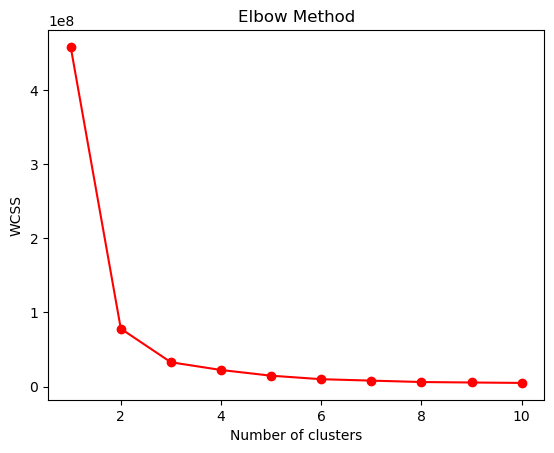

In [65]:
# Determine Optimal Number Of Clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, color='red', marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [66]:
# Fit K means Clustering Model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(df1)


# Add Cluster Labels To Data

df1['cluster'] = kmeans.labels_

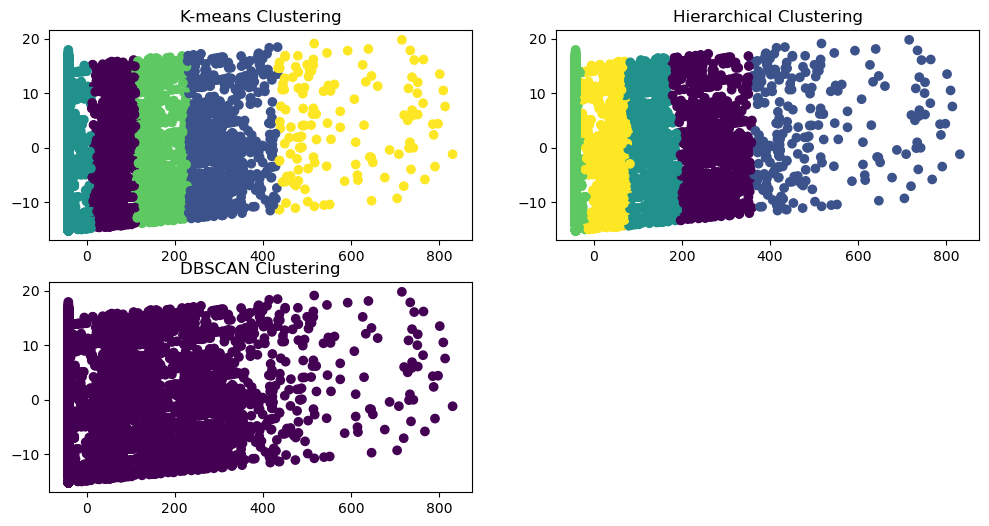

In [67]:
# K-means clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(df1)

# Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical.fit(df1)

# DBSCAN clustering
dbscan = DBSCAN(min_samples=5)
dbscan.fit(df1)


# Dimensionality reduction using PCA
pca = PCA(n_components=5)
df1_pca = pca.fit_transform(df1)

# Visualization
plt.figure(figsize=(12,6))

# K-means visualization
plt.subplot(2, 2, 1)
plt.scatter(df1_pca[:,0], df1_pca[:,1], c=kmeans.labels_)
plt.title('K-means Clustering')

# Hierarchical clustering visualization
plt.subplot(2, 2, 2)
plt.scatter(df1_pca[:,0], df1_pca[:,1], c=hierarchical.labels_)
plt.title('Hierarchical Clustering')

# DBSCAN visualization
plt.subplot(2, 2, 3)
plt.scatter(df1_pca[:,0], df1_pca[:,1], c=dbscan.labels_)
plt.title('DBSCAN Clustering')


plt.show()

In [68]:
# Calculate K-means Clustering Silhouette Score 
from sklearn.metrics import silhouette_score


silhouette_score(df1, kmeans.labels_)


0.8236951199275996

In [69]:
# Calculate Hierarchical Clustering Silhouette Score
from sklearn.metrics import silhouette_score


silhouette_score(df1, hierarchical.labels_)


0.8070801218553577

In [70]:
# Calculate DBSCAN Clustering Silhouette score
from sklearn.metrics import silhouette_score


silhouette_score(df1, dbscan.labels_)


-0.4951644297678678

### Conclusion:


Based on the silhouette scores, it can be concluded that the K-means and Hierarchical clustering algorithms have performed significantly better than the DBSCAN algorithm for the given data. Since the silhouette scores of K-means and Hierarchical clustering are relatively close to each other (0.82 and 0.81, respectively), both algorithms appear to have generated well-defined and well-separated clusters.

1. Either K-means or Hierarchical clustering can be used for the current dataset, as both methods have provided satisfactory cluster quality according to the silhouette scores. The choice between the two can be made based on other factors, such as the desired cluster structure, ease of interpretation, or computational efficiency. K-means is typically faster for large datasets, whereas Hierarchical clustering offers more flexibility in terms of cluster representation with dendrograms.

2. The DBSCAN algorithm cannot be used for this particular dataset since it has a negative silhouette score, which indicates poor cluster quality and significant overlap between clusters.



### My Recommendations To Nexus Bank Are As Follows:

1. Highly Target Young and Middle-Aged Adults: These age groups have shown a relative interest in deposit subscriptions, with Young Adults having the highest percentage of subscription across all the groups. Campaigns with more youth-friendly models would appeal more to this age group. For the middle-aged adults, the bank can create plans that tie investments to retirement goals, housing, or other mature financial goals.

2. Loan Consolidation Schemes/ Loan Collaterals: Introduce schemes that allow customers to consolidate their housing loans with term deposits. With such a scheme, customers wouldn't feel overburdened by having both a deposit and loan simultaneously Or Using the term Deposits as part of the Loan Collaterals.

3. Customer Education: Ensure potential customers are educated about the benefits and security of deposit plans. An informed customer is more likely to subscribe.

4. Improve Customer Service: Ensure the bank's customer service is top-notch. Quick resolution of issues, transparent communication, and courteous service can enhance the overall customer experience and make customers more willing to subscribe to the bank's services.

5. Clarify 'Unknown' and 'Other' Categories: A large proportion of customers fall into the 'Unknown' category, indicating that their outcome of the previous campaign is not recorded. The bank needs to address this data gap. For 'Other', the bank should understand what this category includes and devise strategies accordingly. 

6. Improve Customer Experience: Across all categories, enhance the overall customer experience. This can be achieved through improved services, better communication, and listening to customer feedback to address any negatives. 

7. Data Management: Improve data collection and management, specifically for those customers marked as 'unknown'. Better data can lead to more actionable insights.
